In [1]:
import pandas as pd
import os
from unicodedata import normalize
import re
import math as m
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import math as m

# Init

In [4]:
path01 = 'your_path'
path02 = 'your_path'
path03 = 'your_path'
path04 = 'your_path'
path_plot = path04+'generated/'

In [5]:
def clean_datalist(data):
    #Se toman todos los tweets y se pasan a lista
    #data = dft.text.values.tolist()
    #Remover e-mails y menciones de otras cuentas de twitter con @
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
    #Remover caracteres de nueva línea
    data = [re.sub('\s+', ' ', sent) for sent in data]
    #Remover comillas simples
    data = [re.sub("\'", "", sent) for sent in data]
    #Remover URLs hhtp y https
    data = [re.sub(r"https://\S+", "", sent) for sent in data]
    data = [re.sub(r"http://\S+", "", sent) for sent in data]
    #Remover datos entre corchetes y parentesis por ejemplo [VIDEO]
    data = [re.sub("[\(\[].*?[\)\]]", "", sent) for sent in data]
    #Remove Minusculas
    data = [sent.lower() for sent in data]
    #Maneja ñ
    data = [sent.replace('ñ','n') for sent in data]
    #Remover puntuaciones
    data = [re.sub('[^\w\s]', "", sent) for sent in data]
    #Remover acentos
    data = [normalize('NFC',re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", sent), 0, re.I)) for sent in data]
    #Remover espacios de inicio y fin
    data = [sent.lstrip(' ').rstrip(' ') for sent in data]
    
    return data

In [6]:
dict_codigos = {
    1:'I',
    2:'II',
    3:'III',
    4:'IV',
    5:'V',
    6:'VI',
    7:'VII',
    8:'VIII',
    9:'IX',
    10:'X',
    11:'XI',
    12:'XII',
    13:'XIII',
    14:'XIV',
    15:'XV',
    16:'XVI',
}


dfs2_all = pd.read_csv(path03+'generated/results_s2.csv')
dfs3_all = pd.read_csv(path03+'generated/results_s3.csv')

dfs2_all['cod_reg_rom'] = dfs2_all.cod_reg.map(dict_codigos)
dfs3_all['cod_reg_rom'] = dfs3_all.cod_reg.map(dict_codigos)

dfs2_all['Macrozona'] = np.where((dfs2_all.region=='arica y parinacota') | (dfs2_all.region=='tarapaca') | (dfs2_all.region=='antofagasta') | (dfs2_all.region=='atacama'),'(NORTH)',
                                 np.where((dfs2_all.region=='coquimbo') | (dfs2_all.region=='valparaiso') | (dfs2_all.region=='metropolitana'),'(CENTER)',
                                 np.where((dfs2_all.region=='ohiggins') | (dfs2_all.region=='maule') | (dfs2_all.region=='nuble') | (dfs2_all.region=='biobio'),'(SOUTH CENTRAL)',
                                 np.where((dfs2_all.region=='araucania') | (dfs2_all.region=='los rios') | (dfs2_all.region=='los lagos'),'(SOUTH)',
                                 np.where((dfs2_all.region=='aysen') | (dfs2_all.region=='magallanes'),'(AUSTRAL)','UNKNOWN')))))

dfs3_all['Macrozona'] = np.where((dfs3_all.region=='arica y parinacota') | (dfs3_all.region=='tarapaca') | (dfs3_all.region=='antofagasta') | (dfs3_all.region=='atacama'),'(NORTH)',
                                 np.where((dfs3_all.region=='coquimbo') | (dfs3_all.region=='valparaiso') | (dfs3_all.region=='metropolitana'),'(CENTER)',
                                 np.where((dfs3_all.region=='ohiggins') | (dfs3_all.region=='maule') | (dfs3_all.region=='nuble') | (dfs3_all.region=='biobio'),'(SOUTH CENTRAL)',
                                 np.where((dfs3_all.region=='araucania') | (dfs3_all.region=='los rios') | (dfs3_all.region=='los lagos'),'(SOUTH)',
                                 np.where((dfs3_all.region=='aysen') | (dfs3_all.region=='magallanes'),'(AUSTRAL)','UNKNOWN')))))


dfs2p = dfs2_all[dfs2_all.new_cases_adjusted_mean_mid.isna()==False].copy()
dfs3p = dfs3_all[dfs3_all.new_cases_adjusted_mean_mid.isna()==False].copy()

dfs2 = dfs2_all[['cod_reg','cod_reg_rom','region','expected_imported_cases_scenario_2','risk_rating_scenario_2','local_cases_scenario_2','rt_estimate_scenario_2',
         'risk_rating_scenario_2sim','expected_imported_cases_scenario_2sim']].copy()
dfs3 = dfs3_all[['cod_reg','cod_reg_rom','region','expected_imported_cases_scenario_3','risk_rating_scenario_3','local_cases_scenario_3','rt_estimate_scenario_3',
         'risk_rating_scenario_3sim','expected_imported_cases_scenario_3sim']].copy()

# Scenario 2

xxxxxx6dj8z11hbw43hv0r0000gn/T/ipykernel_11916/2680944863.py:144: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,60])


<Figure size 640x480 with 0 Axes>

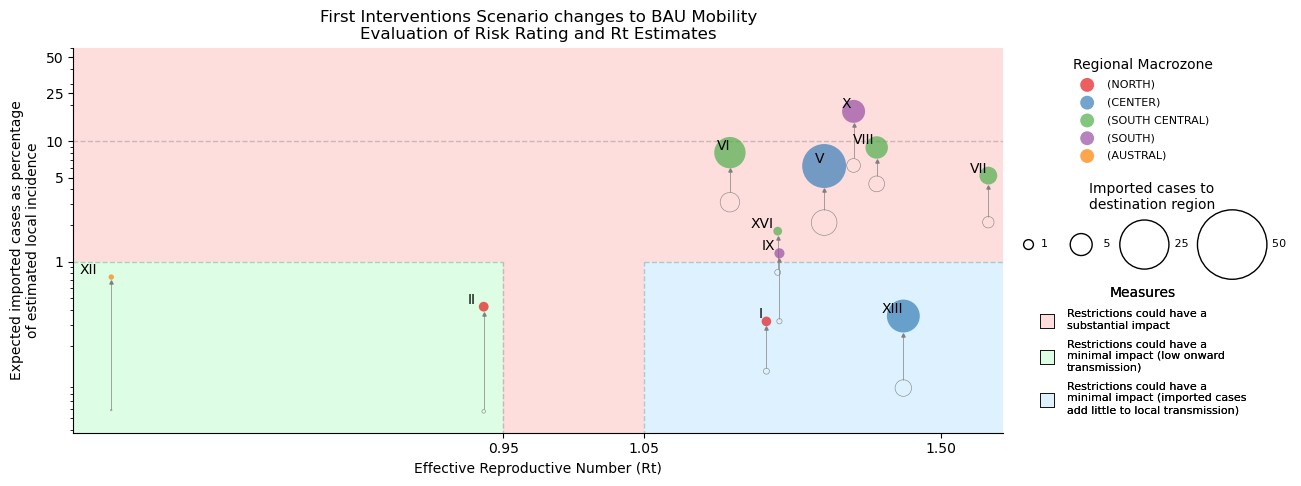

In [237]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,5))
ax = axes

tl_legend = []
x_data = []
y_data = []
x_data_prev = []
y_data_prev = []
size_data = []
size_data_prev = []
mz = ['(NORTH)','(CENTER)','(SOUTH CENTRAL)','(SOUTH)','(AUSTRAL)']
mz_colors = []
size_factor = 50

tableau20 = sns.color_palette('Set1',n_colors=16)

ax.set_title('First Interventions Scenario changes to BAU Mobility\nEvaluation of Risk Rating and Rt Estimates')
ax.fill_between([0,2],0,200,color='#FEDDDD',alpha=1)
#ax.fill_between([0,1.7],0,1,color='white')
ax.fill_between([0,0.95],0,1,color='#DDFEE4',alpha=1)
ax.fill_between([0.95,1.05],0,200,color='#FEDDDD',alpha=1)
ax.fill_between([1.05,1.8],0,1,color='#DDF2FE',alpha=1)

ax.hlines(1,0,0.95,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.hlines(1,1.05,1.8,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.hlines(10,0,100,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.vlines(0.95,0,1,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.vlines(1.05,0,1,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)

pl = []
for j,i in enumerate(dfs2p.region):
    
    # Coloured bubbles
    x = dfs2p.r_mid[dfs2p.region==i].values[0]
    y = 100*dfs2p.expected_imported_cases_scenario_2sim_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0]
    size = size_factor*dfs2p.expected_imported_cases_scenario_2sim_mid[dfs2p.region==i].values[0]
    x_data.append(dfs2p.r_mid[dfs2p.region==i].values[0])
    y_data.append(100*dfs2p.expected_imported_cases_scenario_2sim_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0])
    size_data.append(size_factor*dfs2p.expected_imported_cases_scenario_2sim_mid[dfs2p.region==i].values[0])

    mz_colors.append(np.array(tableau20)[mz.index(dfs2p.Macrozona[dfs2p.region==i].values[0])])

    # Dotted bubbles
    x_prev = dfs2p.r_mid[dfs2p.region==i].values[0]
    y_prev = 100*dfs2p.expected_imported_cases_scenario_2_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0]
    size_prev = size_factor*dfs2p.expected_imported_cases_scenario_2_mid[dfs2p.region==i].values[0]
    x_data_prev.append(dfs2p.r_mid[dfs2p.region==i].values[0])
    y_data_prev.append(100*dfs2p.expected_imported_cases_scenario_2_mid[dfs2p.region==i]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0])
    size_data_prev.append(size_factor*dfs2p.expected_imported_cases_scenario_2_mid[dfs2p.region==i].values[0])

    # Draw the arrows
    r_val = dfs2p.r_mid[dfs2p.region==i].values[0]
    creg = dfs2p.cod_reg[dfs2p.region==i].values[0]
    adj_width = np.log(20**(-(0.77+r_val)))/-1000 #20**(0.77+r_val)#
    pl.append([creg,adj_width])
    arrow_height = 100*dfs2p.expected_imported_cases_scenario_2sim_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0]-100*dfs2p.expected_imported_cases_scenario_2_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0]
    v_line_start = 100*dfs2p.expected_imported_cases_scenario_2_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0]
    v_line_end = 100*dfs2p.expected_imported_cases_scenario_2sim_mid[dfs2p.region==i].values[0]/dfs2p.new_cases_adjusted_mean_mid[dfs2p.region==i].values[0]
    ax.vlines(  r_val,#-0.0002,
                y_prev+arrow_begin[j],
                y-arrow_end[j],
                color='grey',linewidth=0.5,alpha=1,zorder=50)#,linestyles='dashed')
    ax.scatter(r_val, y-arrow_end[j],color='grey',marker="^",s=5,zorder=50) # r_val-0.0002
    

    texto = dfs2p.cod_reg_rom[dfs2p.region==i].values[0]

    if size/size_factor<=10:
      ax.text(x-0.005,y,texto,ha='right',va='bottom',zorder=101)
    else:
      ax.text(x,y,texto,ha='right',va='bottom',zorder=101)


for i,j in enumerate(mz):
  tl_legend.append((j,tableau20[i]))

# Plot bubbles
scatter = ax.scatter(x_data,y_data,s=size_data,alpha=0.7,color=mz_colors,edgecolors='none',zorder=100)
scatter_prev = ax.scatter(x_data_prev,y_data_prev,s=size_data_prev,
                          edgecolor='grey',linewidth=0.4, facecolors='none',zorder=50)

exp = lambda x: -20**(-x)
log = lambda x: np.log(x)
#Fix axis
ax.scatter(aa,bb,color='k',s=0.00,alpha=0)

ax.set_xlim([0.755,1.8])
ax.set_xscale('function', functions=(exp, log))
ax.set_xticks([0.95,1.05,1.5])
ax.set_xlabel('Effective Reproductive Number (Rt)')

ax.set_yscale('log')
ax.set_ylim([0,60])
ax.set_yticks([1,5,10,25,50])
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_ylabel('Expected imported cases as percentage\nof estimated local incidence')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




######## LEYENDAS######
sc_l = []
for m in tableau20[0:len(mz)]:
    sc_l.append(ax.scatter([], [], color=m, alpha=0.7, s=100, edgecolors='none'))

legend1 = ax.legend(tuple(sc_l),tuple(mz),scatterpoints=1, labelspacing=0.7, bbox_to_anchor=[1.15, 0.68], loc='lower center',title='Regional Macrozone',frameon=False,fontsize=8)
fig.add_artist(legend1) 

a1 = plt.scatter([],[], s=1*size_factor, marker='o', facecolors='none', edgecolors='k')
a2 = plt.scatter([],[], s=5*size_factor, marker='o', facecolors='none', edgecolors='k')
a3 = plt.scatter([],[], s=25*size_factor, marker='o', facecolors='none', edgecolors='k')
a4 = plt.scatter([],[], s=50*size_factor, marker='o', facecolors='none', edgecolors='k')
legend2 = ax.legend((a1,a2,a3,a4),('1', '   5', '     25   ','        50'),labelspacing=2.5,scatterpoints=1, bbox_to_anchor=[1.16, 0.45], 
          loc='lower center',title='Imported cases to\ndestination region',ncol=4,fontsize=8,handletextpad=0.1,frameon=False)
fig.add_artist(legend2) 



bckg_l = []
for m in ['#FEDDDD','#DDFEE4','#DDF2FE']:
    bckg_l.append(ax.scatter([], [], color=m, s=100, marker='s',edgecolor='k',linewidths=0.6))

bckg_labels = ['Restrictions could have a\nsubstantial impact','Restrictions could have a \nminimal impact (low onward\ntransmission)','Restrictions could have a \nminimal impact (imported cases \nadd little to local transmission)']

legend3 = ax.legend(tuple(bckg_l),tuple(bckg_labels),scatterpoints=1, labelspacing=0.8, bbox_to_anchor=[1.15, 0.02], loc='lower center',title='Measures',frameon=False,fontsize=8)
fig.add_artist(legend3) # before = ax


fig.savefig(path_plot+'scatter_s2_changes.png',facecolor='white',dpi=1000,bbox_inches="tight") # bbox_extra_artists=[legend1,legend2,legend3]



# Scenario 3

xxxxxx6dj8z11hbw43hv0r0000gn/T/ipykernel_11916/3889533173.py:114: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,60])


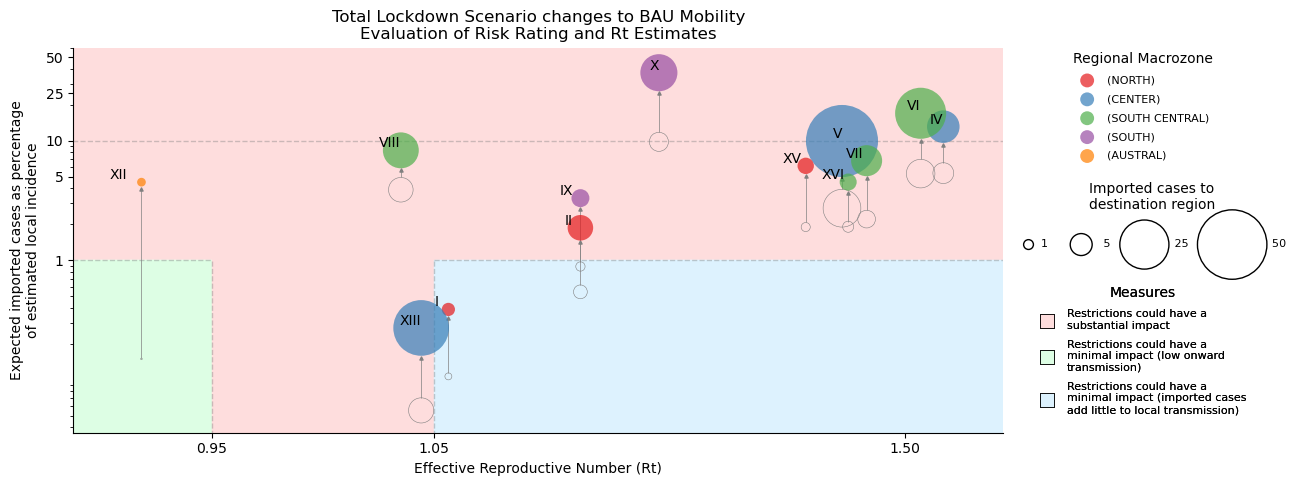

In [236]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,5))
ax = axes

tl_legend = []
x_data = []
y_data = []
size_data = []
x_data_prev = []
y_data_prev = []
size_data_prev = []
mz = ['(NORTH)','(CENTER)','(SOUTH CENTRAL)','(SOUTH)','(AUSTRAL)']
mz_colors = []
size_factor = 50


tableau20 = sns.color_palette('Set1',n_colors=16)

ax.set_title('Total Lockdown Scenario changes to BAU Mobility\nEvaluation of Risk Rating and Rt Estimates')
ax.fill_between([0,2],0,300,color='#FEDDDD',alpha=1)
ax.fill_between([0,1.7],0,1,color='white')
ax.fill_between([0,0.95],0,1,color='#DDFEE4',alpha=1)
ax.fill_between([0.95,1.05],0,200,color='#FEDDDD',alpha=1)
ax.fill_between([1.05,1.8],0,1,color='#DDF2FE',alpha=1)

ax.hlines(1,0,0.95,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.hlines(1,1.05,1.8,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.hlines(10,0,100,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.vlines(0.95,0,1,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)
ax.vlines(1.05,0,1,alpha=0.4,color='grey',linestyles='dashed',linewidth=1)

for j,i in enumerate(dfs3p.region):
    
    x = dfs3p.r_mid[dfs3p.region==i].values[0]
    y = 100*dfs3p.expected_imported_cases_scenario_3sim_mid[dfs3p.region==i].values[0]/dfs3p.new_cases_adjusted_mean_mid[dfs3p.region==i].values[0]
    size = size_factor*dfs3p.expected_imported_cases_scenario_3sim_mid[dfs3p.region==i].values[0]
    x_data.append(dfs3p.r_mid[dfs3p.region==i].values[0])
    y_data.append(100*dfs3p.expected_imported_cases_scenario_3sim_mid[dfs3p.region==i].values[0]/dfs3p.new_cases_adjusted_mean_mid[dfs3p.region==i].values[0])
    size_data.append(size_factor*dfs3p.expected_imported_cases_scenario_3sim_mid[dfs3p.region==i].values[0])
    mz_colors.append(np.array(tableau20)[mz.index(dfs3p.Macrozona[dfs3p.region==i].values[0])])

    # Dotted bubbles
    x_prev = dfs3p.r_mid[dfs3p.region==i].values[0]
    y_prev = 100*dfs3p.expected_imported_cases_scenario_3_mid[dfs3p.region==i].values[0]/dfs3p.new_cases_adjusted_mean_mid[dfs3p.region==i].values[0]
    size_prev = size_factor*dfs3p.expected_imported_cases_scenario_3_mid[dfs3p.region==i].values[0]
    x_data_prev.append(dfs3p.r_mid[dfs3p.region==i].values[0])
    y_data_prev.append(100*dfs3p.expected_imported_cases_scenario_3_mid[dfs3p.region==i]/dfs3p.new_cases_adjusted_mean_mid[dfs3p.region==i].values[0])
    size_data_prev.append(size_factor*dfs3p.expected_imported_cases_scenario_3_mid[dfs3p.region==i].values[0])

    # Draw the arrows
    r_val = dfs3p.r_mid[dfs3p.region==i].values[0]    
    ax.vlines(  r_val, # -0.0002
                y_prev+arrow_begin_s3[j],
                y-arrow_end_s3[j],
                color='grey',linewidth=0.5,alpha=1,zorder=50)#,linestyles='dashed')
    ax.scatter(r_val, y-arrow_end_s3[j],color='grey',marker="^",s=5,zorder=50) # r_val-0.0002

    texto = dfs3p.cod_reg_rom[dfs3p.region==i].values[0]
    #ax.scatter(x,y,color='k',s=0.05)
    if size/50<=10:
      ax.text(x-0.005,y,texto,ha='right',va='bottom',zorder=101)
    else:
      ax.text(x,y,texto,ha='right',va='bottom',zorder=101)

for i,j in enumerate(mz):
  tl_legend.append((j,tableau20[i]))

# Plot bubbles
scatter = ax.scatter(x_data,y_data,s=size_data,alpha=0.7,color=mz_colors,edgecolors='none',zorder=100)
scatter_prev = ax.scatter(x_data_prev,y_data_prev,s=size_data_prev,
                          edgecolor='grey',linewidth=0.4, facecolors='none',zorder=50)
    
exp = lambda x: -20**(-x)
log = lambda x: np.log(x,10)
#Fix axis
ax.scatter(aa2,bb2,color='k',s=0.00,alpha=0)

ax.set_xlim([0.9,1.8])
ax.set_xscale('function', functions=(exp, log))
ax.set_xticks([0.95,1.05,1.5])
ax.set_xlabel('Effective Reproductive Number (Rt)')

ax.set_yscale('log')
ax.set_ylim([0,60])
ax.set_yticks([1,5,10,25,50])
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_ylabel('Expected imported cases as percentage\nof estimated local incidence')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

######## LEYENDAS######
sc_l = []
for m in tableau20[0:len(mz)]:
    sc_l.append(ax.scatter([], [], color=m, alpha=0.7, s=100, edgecolors='none'))

legend1 = ax.legend(tuple(sc_l),tuple(mz),scatterpoints=1, labelspacing=0.8, bbox_to_anchor=[1.15, 0.68], loc='lower center',title='Regional Macrozone',frameon=False,fontsize=8)
fig.add_artist(legend1) # before = ax

a1 = plt.scatter([],[], s=1*size_factor, marker='o', facecolors='none', edgecolors='k')
a2 = plt.scatter([],[], s=5*size_factor, marker='o', facecolors='none', edgecolors='k')
a3 = plt.scatter([],[], s=25*size_factor, marker='o', facecolors='none', edgecolors='k')
a4 = plt.scatter([],[], s=50*size_factor, marker='o', facecolors='none', edgecolors='k')
legend2 = ax.legend((a1,a2,a3,a4),('1', '   5', '     25   ','        50'),labelspacing=2.5,scatterpoints=1, bbox_to_anchor=[1.16, 0.45], 
          loc='lower center',title='Imported cases to\ndestination region',ncol=4,fontsize=8,handletextpad=0.1,frameon=False)
fig.add_artist(legend2) # before = ax



bckg_l = []
for m in ['#FEDDDD','#DDFEE4','#DDF2FE']:
    bckg_l.append(ax.scatter([], [], color=m, s=100, marker='s',edgecolor='k',linewidths=0.6))

bckg_labels = ['Restrictions could have a\nsubstantial impact','Restrictions could have a \nminimal impact (low onward\ntransmission)','Restrictions could have a \nminimal impact (imported cases \nadd little to local transmission)']

legend3 = ax.legend(tuple(bckg_l),tuple(bckg_labels),scatterpoints=1, labelspacing=0.8, bbox_to_anchor=[1.15, 0.02], loc='lower center',title='Measures',frameon=False,fontsize=8)
fig.add_artist(legend3) # before = ax


fig.savefig(path_plot+'scatter_s3_changes.png',facecolor='white',dpi=1000, bbox_inches="tight")

